# Machine learning and FinTech Hw 1.                                        0616098 黃秉茂

#### import every module I need

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import math   # This will import math module
np.seterr(divide='ignore', invalid='ignore')

## 1. For your individual final project, think about the following questions and write down your answers. 

### a) What is the topic about FinTech you would like to work out? Briefly explain your problem.

股票買賣<br>
判斷應該是要買多還是賣空、預判漲跌，然後使利潤最大化

### b) Write down your motivations and explain why this topic is important? 

* 動機：個人利益方面，當然是希望所學能幫自己賺錢。社會方面，因為AI在有些方面已經超越人類了，像是圍棋，而運用在財金方面是否能有顯著的提供協助?財金相較於其他領域是更貼近人們的生活的，因此可能對人類的生活產生巨變，而且投資要考量的變數實在很多，所以我很好奇運用AI技術的投資能否打敗人類。
* 重要性：AI已經有發展到一定的程度了，然而運用AI的領域實在不算多，目前可能只有遊戲、視覺、跟自然語言處理有比較傑出的成果，AI勢必還需要在某些能大大改變人們生活的領域發展，更能顯的AI會如何影響人類。如果AI加上財金將會大大地改變人們的生活，而且投資並不是只有考量數學，還是一門跟人文、心理相關的學問，而AI是否能連這些都考慮到是我所好奇的。

### c) Provide at least one related work (paper or book) about the topic.

* Lee, Tae Kyun, et al. "Global stock market investment strategies based on financial network indicators using machine learning techniques." Expert Systems with Applications 117 (2019): 228-242.
["Global stock market investment strategies based on financial network indicators using machine learning techniques](https://www.sciencedirect.com/science/article/pii/S0957417418305761)
* Groth, Sven S., and Jan Muntermann. "Supporting Investment Management Processes with Machine Learning Techniques." Wirtschaftsinformatik (2). 2009.
["Supporting Investment Management Processes with Machine Learning Techniques"](https://www.researchgate.net/profile/Martin_Sedlmayr/publication/221200937_Unterstutzung_medizinischer_Leitlinien_-_Von_der_zielorientierten_Modellierung_zur_proaktiven_Assistenz/links/0a85e531c2277cd61d000000.pdf#page=275)
* Hegazy, Osman, Omar S. Soliman, and Mustafa Abdul Salam. "A machine learning model for stock market prediction." arXiv preprint arXiv:1402.7351 (2014).
["A machine learning model for stock market prediction"](https://arxiv.org/ftp/arxiv/papers/1402/1402.7351.pdf)
* Patel, Jigar, et al. "Predicting stock and stock price index movement using trend deterministic data preparation and machine learning techniques." Expert systems with applications 42.1 (2015): 259-268.
["Predicting stock and stock price index movement using trend deterministic data preparation and machine learning techniques."](https://www.sciencedirect.com/science/article/pii/S0957417414004473)

### d) Formulate your problem as clear as possible. 

* 起始金額為100,000元，希望最後能賺最多錢
* 每天都要判斷買多還是賣多這固定的十檔股票(0050、0056、台積電、大立光、聯發科、鴻海、玉山金、富邦金、國泰金、元大金)
* 自變數會用先前的開盤價、最高價、最低價、收盤價、成交量、5日均價、20日均價、網路聲量(如果有學會爬蟲的話)等等，而變數就是這十檔分別該買還是賣
* 預測哪些會漲那些會跌之後，認為漲的就花10,000元左右去買且隔天賣掉，認為會跌的也是融券約10,000元的額度且隔天買回，隔天都會平倉

### e) Find the data you would like to use. Write down the source of your data, summarize the data set information and attribution information. Provide the exploratory data analysis (EDA) for your data. 

data source: yahoo finance, TEJ, apple stock<br>
會先將.csv下載下來後，再使用pandas, numpy等進行EDA

In [2]:
stock_data = pd.read_csv('stock(eng)2.csv',encoding='utf-8')
print("dataset_shape = ", stock_data.shape)

dataset_shape =  (14020, 29)


In [3]:
stock_data.head()

,CO_ID,Date,Open(NTD),High(NTD),Low(NTD),Close(NTD),Volume(1000S),Amount(NTD1000),AVG CLOSE,AVG CLOSE 5D,...,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Market,Capital,No.of Employee,Fiscal Year End,Announcement Date - SALE
0,0050 Yuanta Taiwan Top50,2015/1/5,66.4,66.75,66,66.55,"6,295","417,637",66.3379,66.81,...,NaN,NaN,2.33,-0.30,1.1219,TSE,NaN,NaN,NaN,NaN
1,0050 Yuanta Taiwan Top50,2015/1/6,65.75,65.75,64.75,64.9,"19,501","1,272,547",65.2527,66.47,...,NaN,NaN,2.39,-1.65,1.5026,TSE,NaN,NaN,NaN,NaN
2,0050 Yuanta Taiwan Top50,2015/1/7,64.7,65.25,64.7,65,"6,991","454,539",65.0127,66.03,...,NaN,NaN,2.38,0.10,0.8475,TSE,NaN,NaN,NaN,NaN
3,0050 Yuanta Taiwan Top50,2015/1/8,65.5,66.6,65.5,66.5,"13,153","871,151",66.2295,65.96,...,NaN,NaN,2.33,1.50,1.6923,TSE,NaN,NaN,NaN,NaN
4,0050 Yuanta Taiwan Top50,2015/1/9,66.9,66.95,66.05,66.15,"5,891","391,342",66.4195,65.82,...,NaN,NaN,2.34,-0.35,1.3534,TSE,NaN,NaN,NaN,NaN


In [4]:
print("is_any_null ", stock_data.isnull().values.any())

is_any_null  True


#### data preprocess for dropping column with lots of NaN or replacing NaN with mean

In [5]:
stock_data = stock_data.dropna(thresh=len(stock_data.index) * 0.8, axis=1)
stock_data = stock_data.fillna(stock_data.mean())

In [7]:
stock_data.head()

,CO_ID,Date,Open(NTD),High(NTD),Low(NTD),Close(NTD),Volume(1000S),Amount(NTD1000),AVG CLOSE,AVG CLOSE 5D,...,P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Market,Capital,No.of Employee,Fiscal Year End
0,0050 Yuanta Taiwan Top50,2015/1/5,66.4,66.75,66,66.55,"6,295","417,637",66.3379,66.81,...,15.044964,2.296988,4.227955,2.33,-0.30,1.1219,TSE,NaN,NaN,12.0
1,0050 Yuanta Taiwan Top50,2015/1/6,65.75,65.75,64.75,64.9,"19,501","1,272,547",65.2527,66.47,...,15.044964,2.296988,4.227955,2.39,-1.65,1.5026,TSE,NaN,NaN,12.0
2,0050 Yuanta Taiwan Top50,2015/1/7,64.7,65.25,64.7,65,"6,991","454,539",65.0127,66.03,...,15.044964,2.296988,4.227955,2.38,0.10,0.8475,TSE,NaN,NaN,12.0
3,0050 Yuanta Taiwan Top50,2015/1/8,65.5,66.6,65.5,66.5,"13,153","871,151",66.2295,65.96,...,15.044964,2.296988,4.227955,2.33,1.50,1.6923,TSE,NaN,NaN,12.0
4,0050 Yuanta Taiwan Top50,2015/1/9,66.9,66.95,66.05,66.15,"5,891","391,342",66.4195,65.82,...,15.044964,2.296988,4.227955,2.34,-0.35,1.3534,TSE,NaN,NaN,12.0


In [8]:
stock_data.tail()

,CO_ID,Date,Open(NTD),High(NTD),Low(NTD),Close(NTD),Volume(1000S),Amount(NTD1000),AVG CLOSE,AVG CLOSE 5D,...,P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Market,Capital,No.of Employee,Fiscal Year End
14015,2885 Yuanta Group,2020/9/21,18.2,18.25,18,18,"26,320","476,759",18.1137,18.24,...,11.4330,0.9541,5.83,3.4722,-0.30,1.3661,TSE,"121,374,359,140","14,223",12.0
14016,2885 Yuanta Group,2020/9/22,17.95,18,17.7,17.75,"30,579","544,932",17.8202,18.14,...,11.2742,0.9408,5.92,3.5211,-0.25,1.6667,TSE,"121,374,359,140","14,223",12.0
14017,2885 Yuanta Group,2020/9/23,17.75,17.85,17.65,17.7,"19,604","347,381",17.7191,18.01,...,11.2425,0.9382,5.93,3.5311,-0.05,1.1268,TSE,"121,374,359,140","14,223",12.0
14018,2885 Yuanta Group,2020/9/24,17.55,17.55,17.15,17.15,"44,211","763,162",17.2618,17.78,...,10.8931,0.9090,6.12,3.6443,-0.55,2.2599,TSE,"121,374,359,140","14,223",12.0
14019,2885 Yuanta Group,2020/9/25,17.25,17.6,17.2,17.3,"26,052","451,970",17.3485,17.58,...,10.9884,0.9170,6.07,3.6127,0.15,2.3324,TSE,"121,374,359,140","14,223",12.0


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14020 entries, 0 to 14019
Data columns (total 28 columns):
CO_ID                  14020 non-null object
Date                   14020 non-null object
Open(NTD)              14020 non-null object
High(NTD)              14020 non-null object
Low(NTD)               14020 non-null object
Close(NTD)             14020 non-null object
Volume(1000S)          14020 non-null object
Amount(NTD1000)        14020 non-null object
AVG CLOSE              14012 non-null object
AVG CLOSE 5D           14020 non-null object
AVG CLOSE 10D          14020 non-null object
AVG CLOSE 20D          14020 non-null object
AVG Vol 5D             14020 non-null object
AVG Vol 10D            14020 non-null object
AVG Vol 20D            14020 non-null object
ROI%                   14020 non-null float64
Shares(1000S)          14020 non-null object
Market Cap.(NTD MN)    14020 non-null object
P/E-TEJ                14020 non-null float64
P/B-TEJ                14020 non-n

In [10]:
stock_data.describe()

,ROI%,P/E-TEJ,P/B-TEJ,Dividend_Yield%,Cash_Dividend%,Price_Change(NTD),High minus Low %,Fiscal Year End
count,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.0
mean,0.046360,15.044964,2.296988,4.227955,3.663234,0.139675,1.391597,12.0
std,1.617399,6.357659,1.845026,1.513258,1.391331,32.966458,1.234087,0.0
min,-10.000000,5.530000,0.590000,0.890000,0.000000,-465.000000,0.000000,12.0
25%,-0.662300,10.760000,1.110000,3.320000,2.654900,-0.350000,0.659900,12.0
50%,0.000000,14.820000,1.660000,4.227955,3.590000,0.000000,1.183400,12.0
75%,0.732825,16.240000,2.296988,5.020000,4.540000,0.400000,1.800150,12.0
max,10.000000,47.550000,12.200000,11.000000,11.000000,390.000000,12.797600,12.0


In [11]:
print(stock_data.nunique())

CO_ID                     10
Date                    1402
Open(NTD)               3224
High(NTD)               3246
Low(NTD)                3280
Close(NTD)              3289
Volume(1000S)          11507
Amount(NTD1000)        13970
AVG CLOSE              13927
AVG CLOSE 5D            7686
AVG CLOSE 10D           9088
AVG CLOSE 20D           9956
AVG Vol 5D             13999
AVG Vol 10D            13997
AVG Vol 20D            14002
ROI%                    8062
Shares(1000S)           1198
Market Cap.(NTD MN)     6911
P/E-TEJ                 3977
P/B-TEJ                 2794
Dividend_Yield%          787
Cash_Dividend%          3323
Price_Change(NTD)        476
High minus Low %        6099
Market                     1
Capital                    8
No.of Employee             8
Fiscal Year End            1
dtype: int64


In [12]:
stock_data_cols = stock_data.columns
stock_data_cols_set = set(stock_data_cols)
stock_data_cols_list = list(stock_data_cols_set)
stock_data_continuous_variables_cols = stock_data._get_numeric_data().columns
stock_data_continuous_variables_cols_set = set(stock_data_continuous_variables_cols)
stock_data_continuous_variables_cols_list = list(stock_data_continuous_variables_cols_set)
print("stock_data_continuous_variables: ", stock_data_continuous_variables_cols_list)
stock_data_categorical_variables_cols_set = stock_data_cols_set - stock_data_continuous_variables_cols_set
stock_data_categorical_variables_cols_list = list(stock_data_categorical_variables_cols_set)
print("stock_data_categorical_variables:", stock_data_categorical_variables_cols_list)

stock_data_continuous_variables:  ['Cash_Dividend%', 'P/E-TEJ', 'P/B-TEJ', 'Price_Change(NTD)', 'ROI%', 'Dividend_Yield%', 'High minus Low %', 'Fiscal Year End']
stock_data_categorical_variables: ['AVG Vol 20D', 'Close(NTD)', 'Amount(NTD1000)', 'CO_ID', 'Market Cap.(NTD MN)', 'AVG CLOSE', 'Shares(1000S)', 'Capital', 'Market', 'Volume(1000S)', 'AVG Vol 10D', 'AVG CLOSE 10D', 'Low(NTD)', 'High(NTD)', 'Open(NTD)', 'Date', 'AVG Vol 5D', 'No.of Employee', 'AVG CLOSE 5D', 'AVG CLOSE 20D']


#### frequency tables

In [13]:
[print(f'categorical variable: {i}\n{stock_data[i].value_counts()}\n') for i in stock_data_categorical_variables_cols_list]

categorical variable: AVG Vol 20D
836.072      2
11,533.87    2
8,698.11     2
1,040.58     2
20,689.22    2
            ..
9,325.47     1
16,012.79    1
13,724.68    1
21,524.92    1
10,313.84    1
Name: AVG Vol 20D, Length: 14002, dtype: int64

categorical variable: Close(NTD)
18.3     45
18.4     36
13       34
18.25    33
18.45    32
         ..
29.72     1
405.5     1
25.23     1
125.5     1
4,170     1
Name: Close(NTD), Length: 3289, dtype: int64

categorical variable: Amount(NTD1000)
0            8
395,994      2
823,324      2
13,146       2
873,460      2
            ..
494,356      1
519,473      1
692,841      1
3,488,949    1
2,774,938    1
Name: Amount(NTD1000), Length: 13970, dtype: int64

categorical variable: CO_ID
0056 PTD                    1402
3008 Largan                 1402
2330 TSMC                   1402
2884 E.S.F.H                1402
2454 MediaTek               1402
0050 Yuanta Taiwan Top50    1402
2885 Yuanta Group           1402
2882 Cathay Holdings        

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### relative frequency tables

In [14]:
[print(f'categorical variable: {i}\n{stock_data[i].value_counts(normalize=True, sort=True)}\n') for i in stock_data_categorical_variables_cols_list]

categorical variable: AVG Vol 20D
836.072      0.000143
11,533.87    0.000143
8,698.11     0.000143
1,040.58     0.000143
20,689.22    0.000143
               ...   
9,325.47     0.000071
16,012.79    0.000071
13,724.68    0.000071
21,524.92    0.000071
10,313.84    0.000071
Name: AVG Vol 20D, Length: 14002, dtype: float64

categorical variable: Close(NTD)
18.3     0.003210
18.4     0.002568
13       0.002425
18.25    0.002354
18.45    0.002282
           ...   
29.72    0.000071
405.5    0.000071
25.23    0.000071
125.5    0.000071
4,170    0.000071
Name: Close(NTD), Length: 3289, dtype: float64

categorical variable: Amount(NTD1000)
0            0.000571
395,994      0.000143
823,324      0.000143
13,146       0.000143
873,460      0.000143
               ...   
494,356      0.000071
519,473      0.000071
692,841      0.000071
3,488,949    0.000071
2,774,938    0.000071
Name: Amount(NTD1000), Length: 13970, dtype: float64

categorical variable: CO_ID
0056 PTD                    0.1
3

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### bar plots

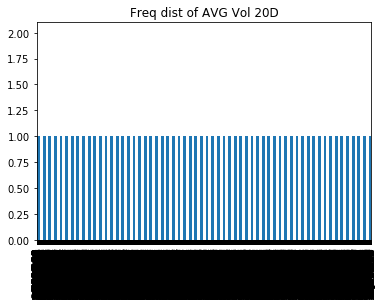

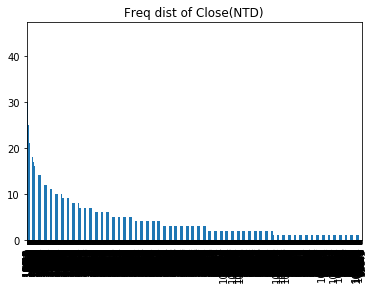

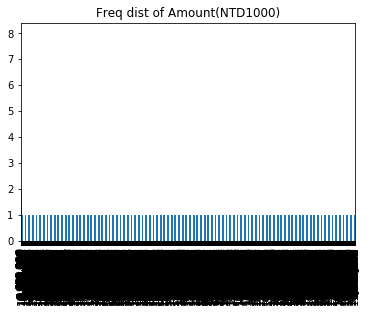

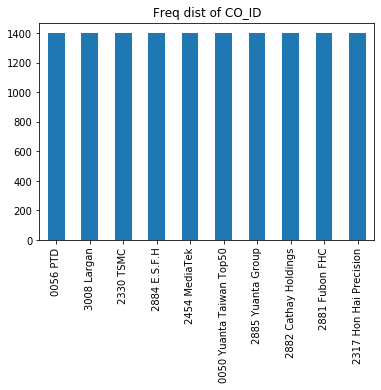

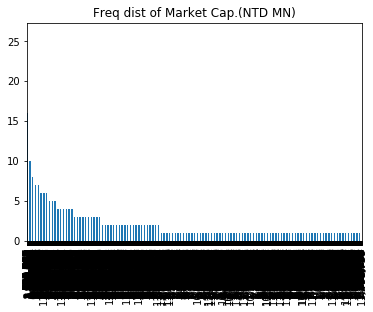

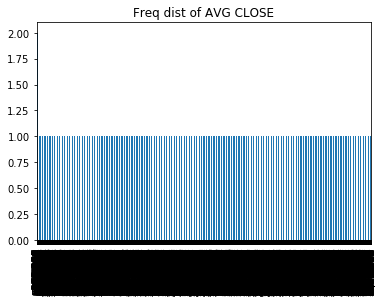

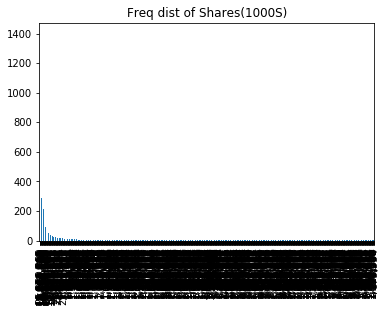

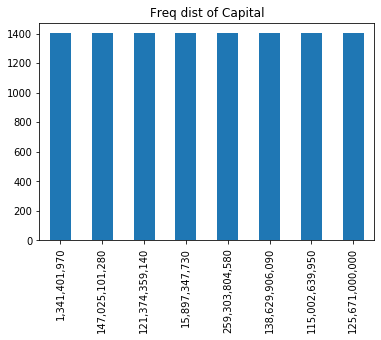

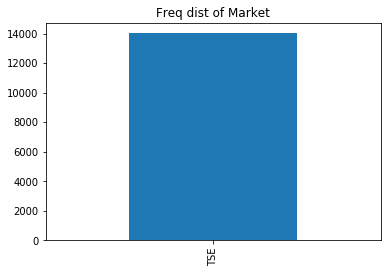

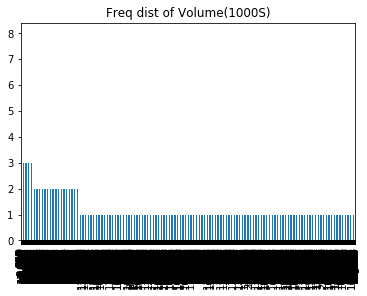

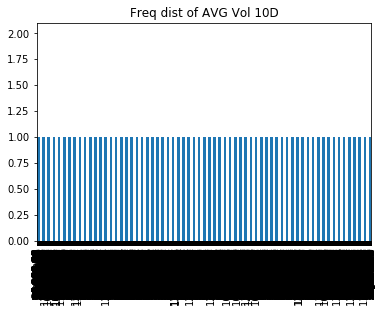

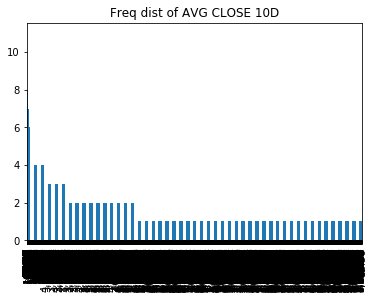

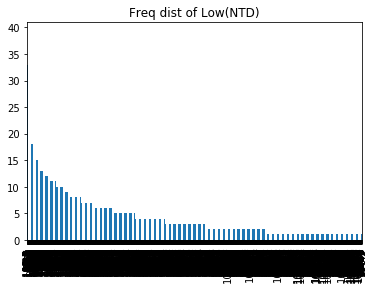

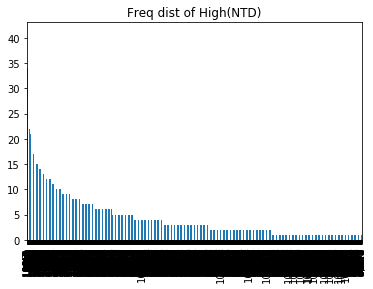

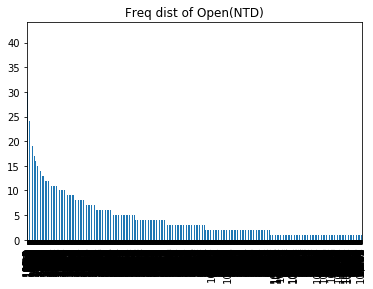

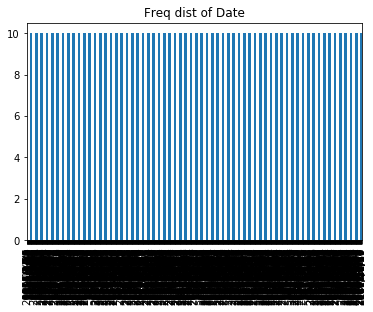

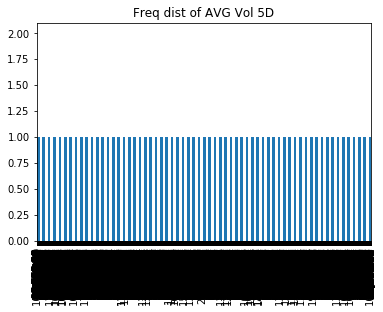

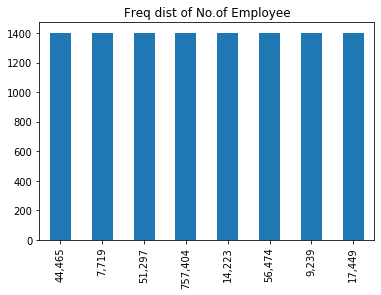

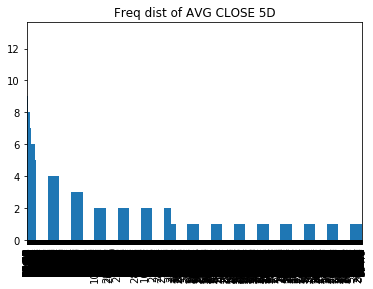

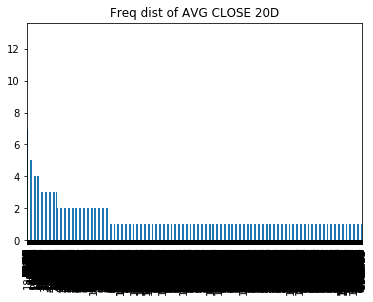

In [46]:
# [stock_data[i].value_counts().plot.bar(title=f'Freq dist of {i}') for i in stock_data_categorical_variables_cols_list]
for stock_data_categorical_variables_col in stock_data_categorical_variables_cols_list:
    stock_data[stock_data_categorical_variables_col].value_counts().plot.bar()
    plt.title(f'Freq dist of {stock_data_categorical_variables_col}')
    # plt.savefig(f'bar{stock_data_categorical_variables_col}.png')
    plt.show()

#### histograms

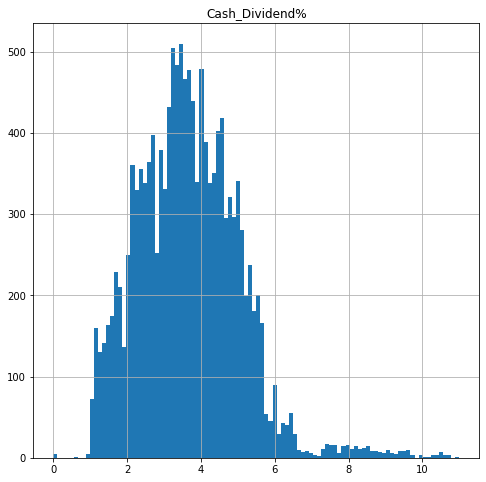

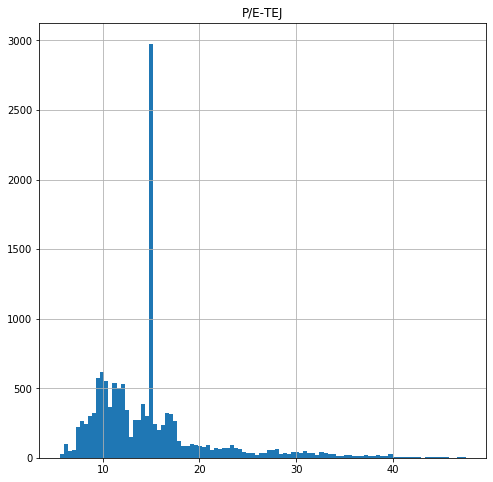

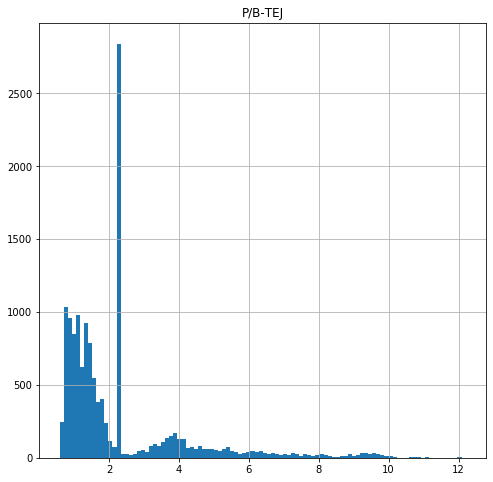

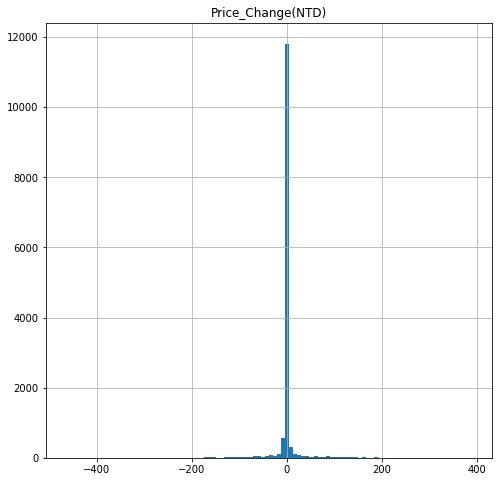

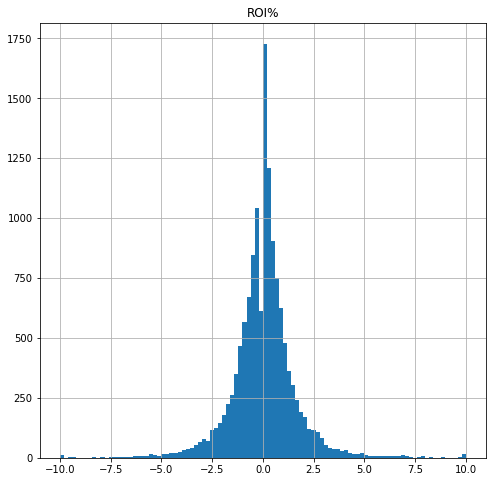

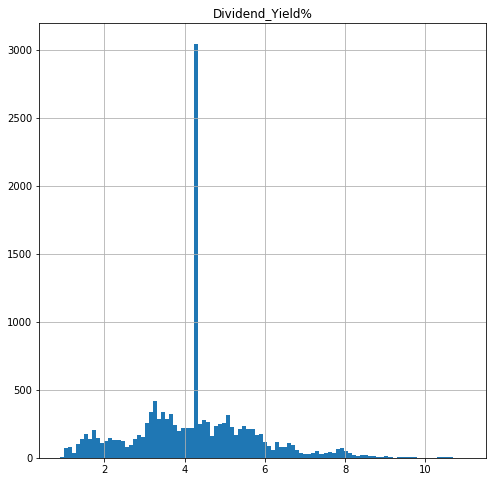

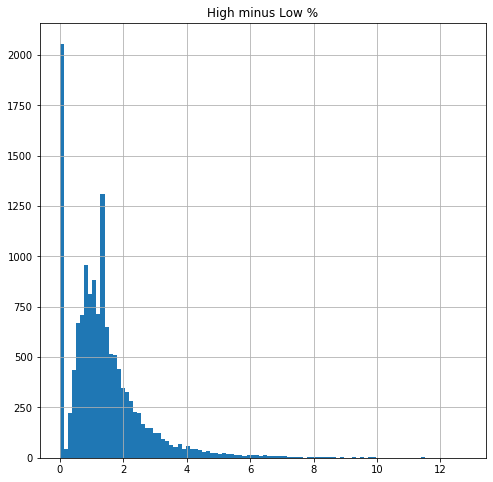

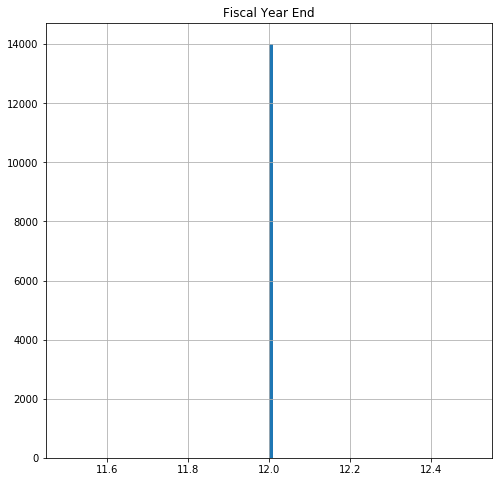

In [15]:
for stock_data_continuous_variables_col in stock_data_continuous_variables_cols_list: 
    stock_data[stock_data_continuous_variables_col].hist(figsize= (8, 8), bins= 100)
    plt.title(stock_data_continuous_variables_col)
    # plt.savefig(f'hist{stock_data_continuous_variables_col}.png')
    plt.show()

#### distribution plots

D:\programming\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\programming\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


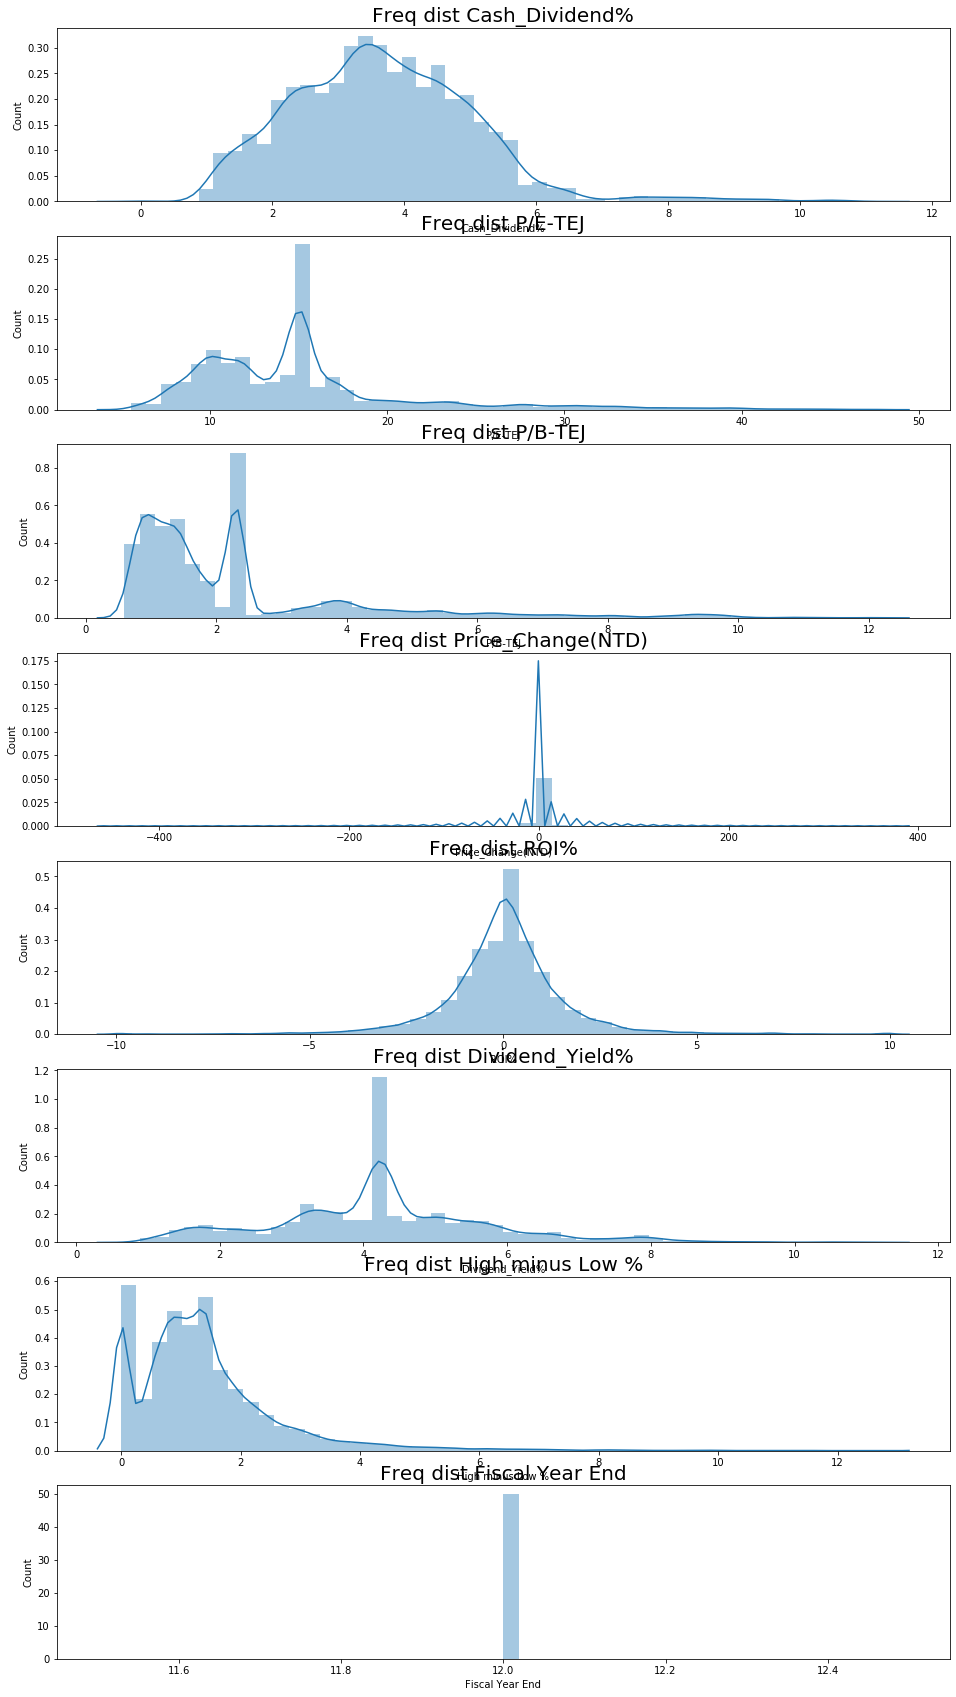

In [16]:
fig, ax = plt.subplots(len(stock_data_continuous_variables_cols_list), figsize=(16, 30))
for stock_data_idx, stock_data_continuous_variables_col in enumerate(stock_data_continuous_variables_cols_list):
    sns.distplot(stock_data[stock_data_continuous_variables_col], hist=True, ax=ax[stock_data_idx])
    ax[stock_data_idx].set_title('Freq dist '+ stock_data_continuous_variables_col, fontsize=20)
    ax[stock_data_idx].set_xlabel(stock_data_continuous_variables_col, fontsize=10)
    ax[stock_data_idx].set_ylabel('Count', fontsize=10)
plt.show()

#### pairwise scatterplots

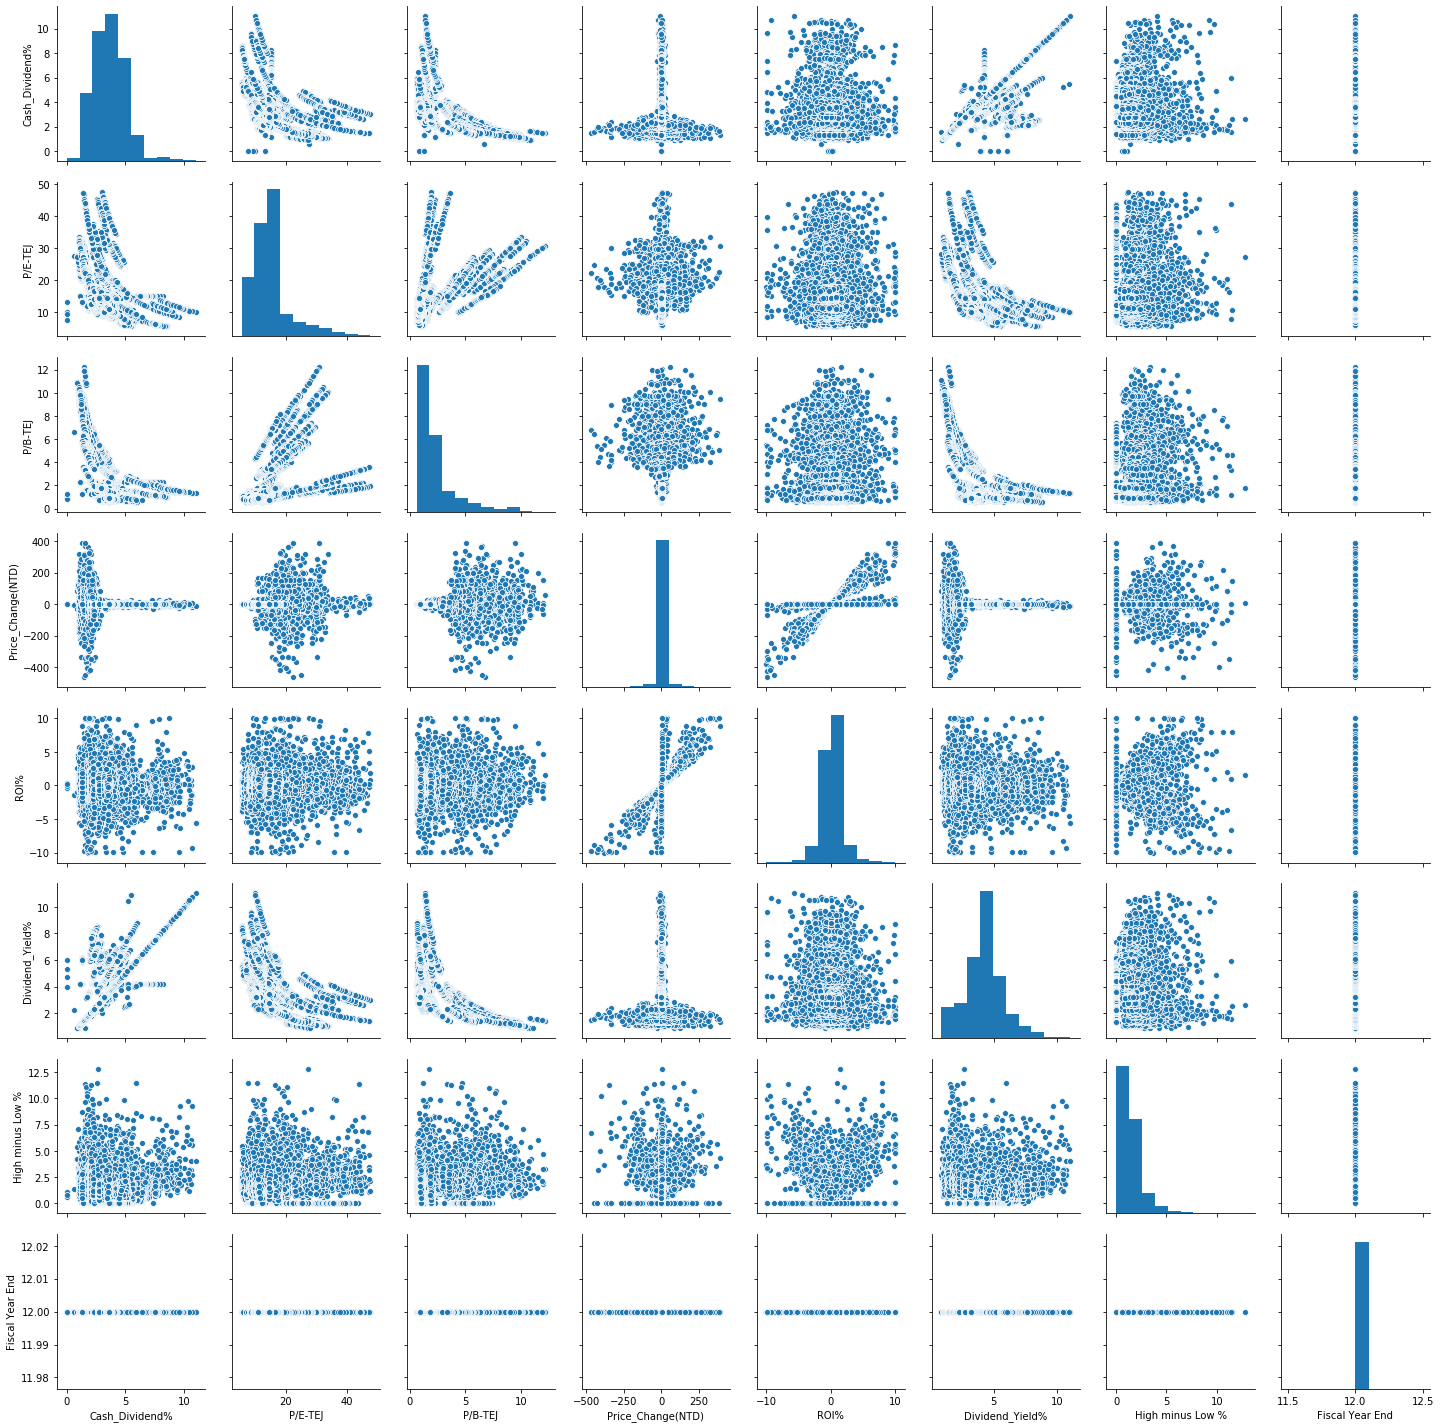

In [17]:
sns.pairplot(stock_data[stock_data_continuous_variables_cols_list])
plt.show()

#### heatmap

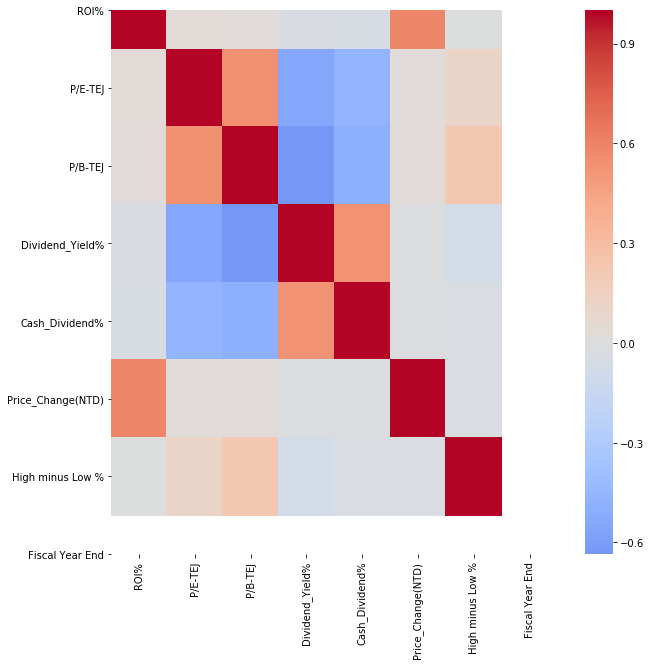

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(stock_data.corr(), annot=False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
#plt.savefig('heatmap.png')
plt.show()

## 2. Please download the adult dataset and practice how to conduct exploratory data analysis. 

#### read csv in jupyter notebook

In [19]:
dataset = pd.read_csv('adult.csv')

#### Viewing/inspecting data

In [20]:
print("dataset_shape = ", dataset.shape)

dataset_shape =  (32560, 15)


In [21]:
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [22]:
dataset.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### data preprocess, add column names

In [24]:
attribute_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annual-income']

In [25]:
dataset = pd.read_csv('adult.csv', header=None, names=attribute_name)

In [26]:
print("dataset_shape = ", dataset.shape)

dataset_shape =  (32561, 15)


In [27]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
annual-income     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 1. Show the summary statistics of all numerical variables. 

In [30]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
print(dataset.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
annual-income         2
dtype: int64


### 2. Identify categorical and continuous variables. 

In [32]:
cols = dataset.columns
continuous_variables_cols = dataset._get_numeric_data().columns

#### continuous variables

In [33]:
continuous_variables_cols_set = set(continuous_variables_cols)

In [34]:
continuous_variables_cols_list = list(continuous_variables_cols_set)
print("continuous_variables:", continuous_variables_cols_list)

continuous_variables: ['hours-per-week', 'capital-loss', 'education-num', 'capital-gain', 'age', 'fnlwgt']


#### categorical variables

In [35]:
categorical_variables_cols_set = set(cols) - set(continuous_variables_cols)

In [36]:
categorical_variables_cols_list = list(categorical_variables_cols_set)
print("categorical_variables:", categorical_variables_cols_list)

categorical_variables: ['marital-status', 'annual-income', 'native-country', 'sex', 'race', 'relationship', 'workclass', 'education', 'occupation']


### 3. For each categorical variable, print frequency and relative frequency tables. 

#### frequency tables

In [37]:
[print(f'categorical variable: {i}\n{dataset[i].value_counts()}\n') for i in categorical_variables_cols_list]

categorical variable: marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

categorical variable: annual-income
 <=50K    24720
 >50K      7841
Name: annual-income, dtype: int64

categorical variable: native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominic

[None, None, None, None, None, None, None, None, None]

#### relative frequency tables

In [38]:
[print(f'categorical variable: {i}\n{dataset[i].value_counts(normalize=True, sort=True)}\n') for i in categorical_variables_cols_list]

categorical variable: marital-status
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

categorical variable: annual-income
 <=50K    0.75919
 >50K     0.24081
Name: annual-income, dtype: float64

categorical variable: native-country
 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China        

[None, None, None, None, None, None, None, None, None]

### 4. Draw bar plots for each categorical variable. 

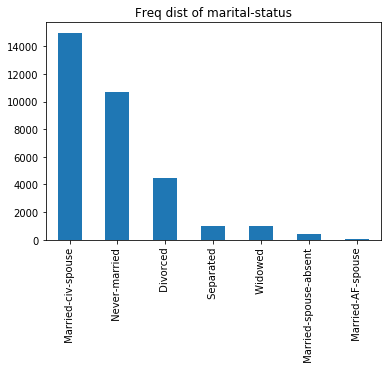

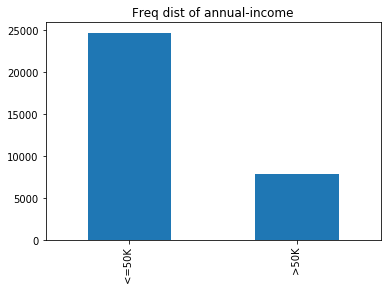

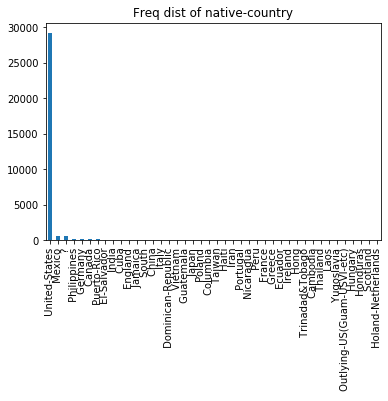

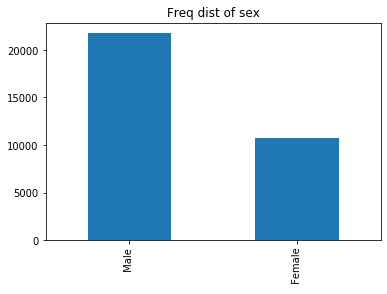

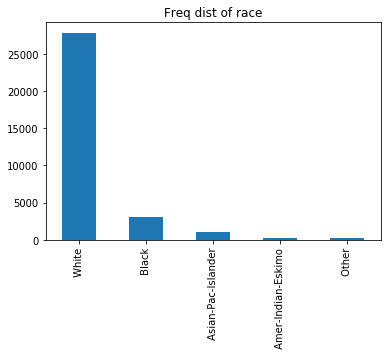

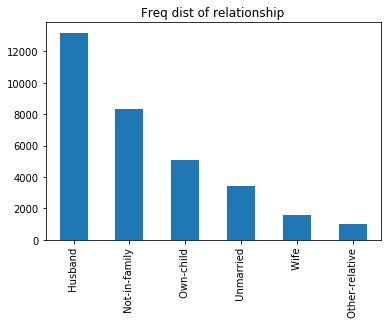

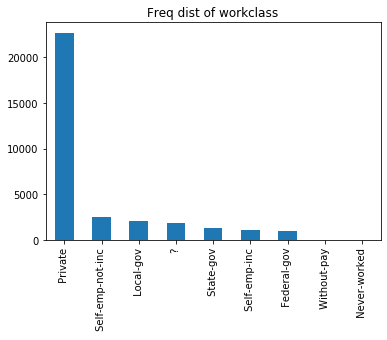

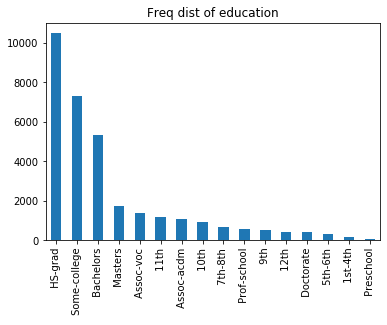

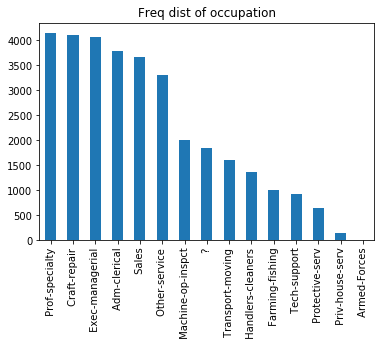

In [39]:
# [dataset[i].value_counts().plot.bar(title=f'Freq dist of {i}') for i in categorical_variables_cols_list]
for categorical_variables_col in categorical_variables_cols_list:
    dataset[categorical_variables_col].value_counts().plot.bar()
    plt.title(f'Freq dist of {categorical_variables_col}')
    # plt.savefig(f'bar{categorical_variables_col}.png')
    plt.show()

### 5. For each continuous variable, draw histograms and distribution plots. 

#### histograms

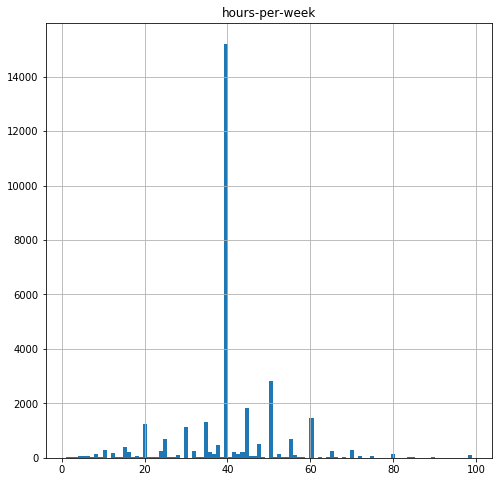

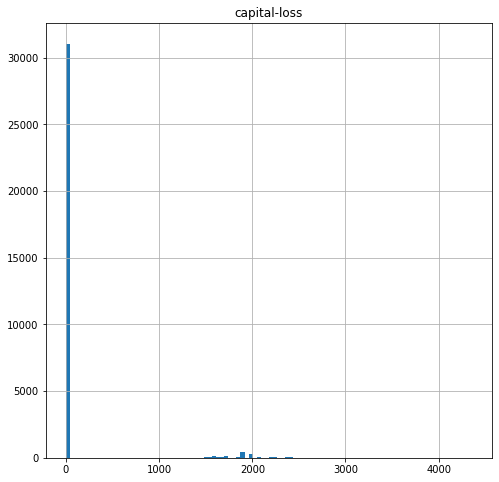

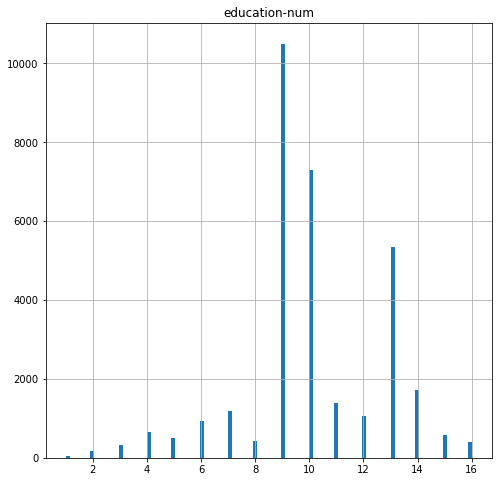

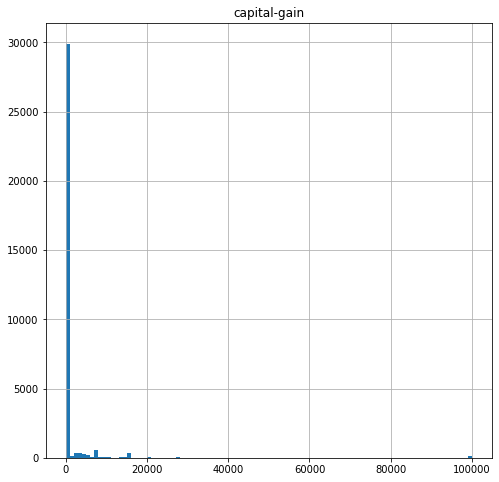

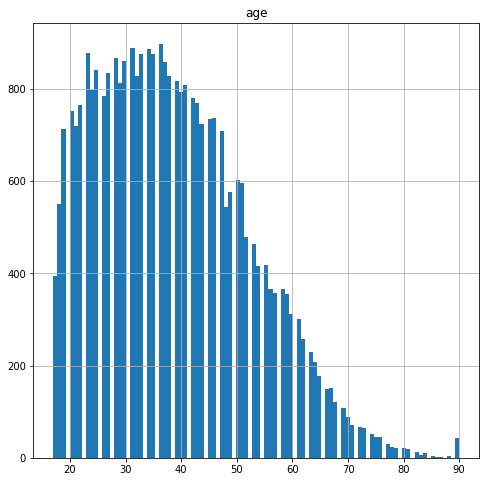

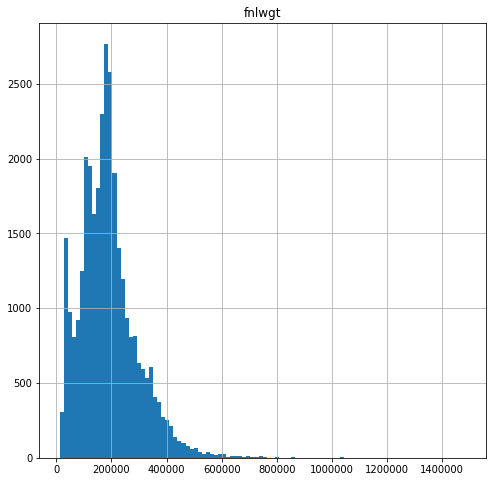

In [40]:
# method1
for continuous_variables_col in continuous_variables_cols_list: 
    dataset[continuous_variables_col].hist(figsize= (8, 8), bins= 100)
    plt.title(continuous_variables_col)
    # plt.savefig(f'hist{continuous_variables_col}.png')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E001DC4EC8>,
      dtype=object)

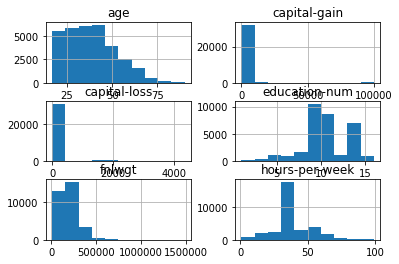

In [41]:
# method2
dataset.hist()

#### distribution plots

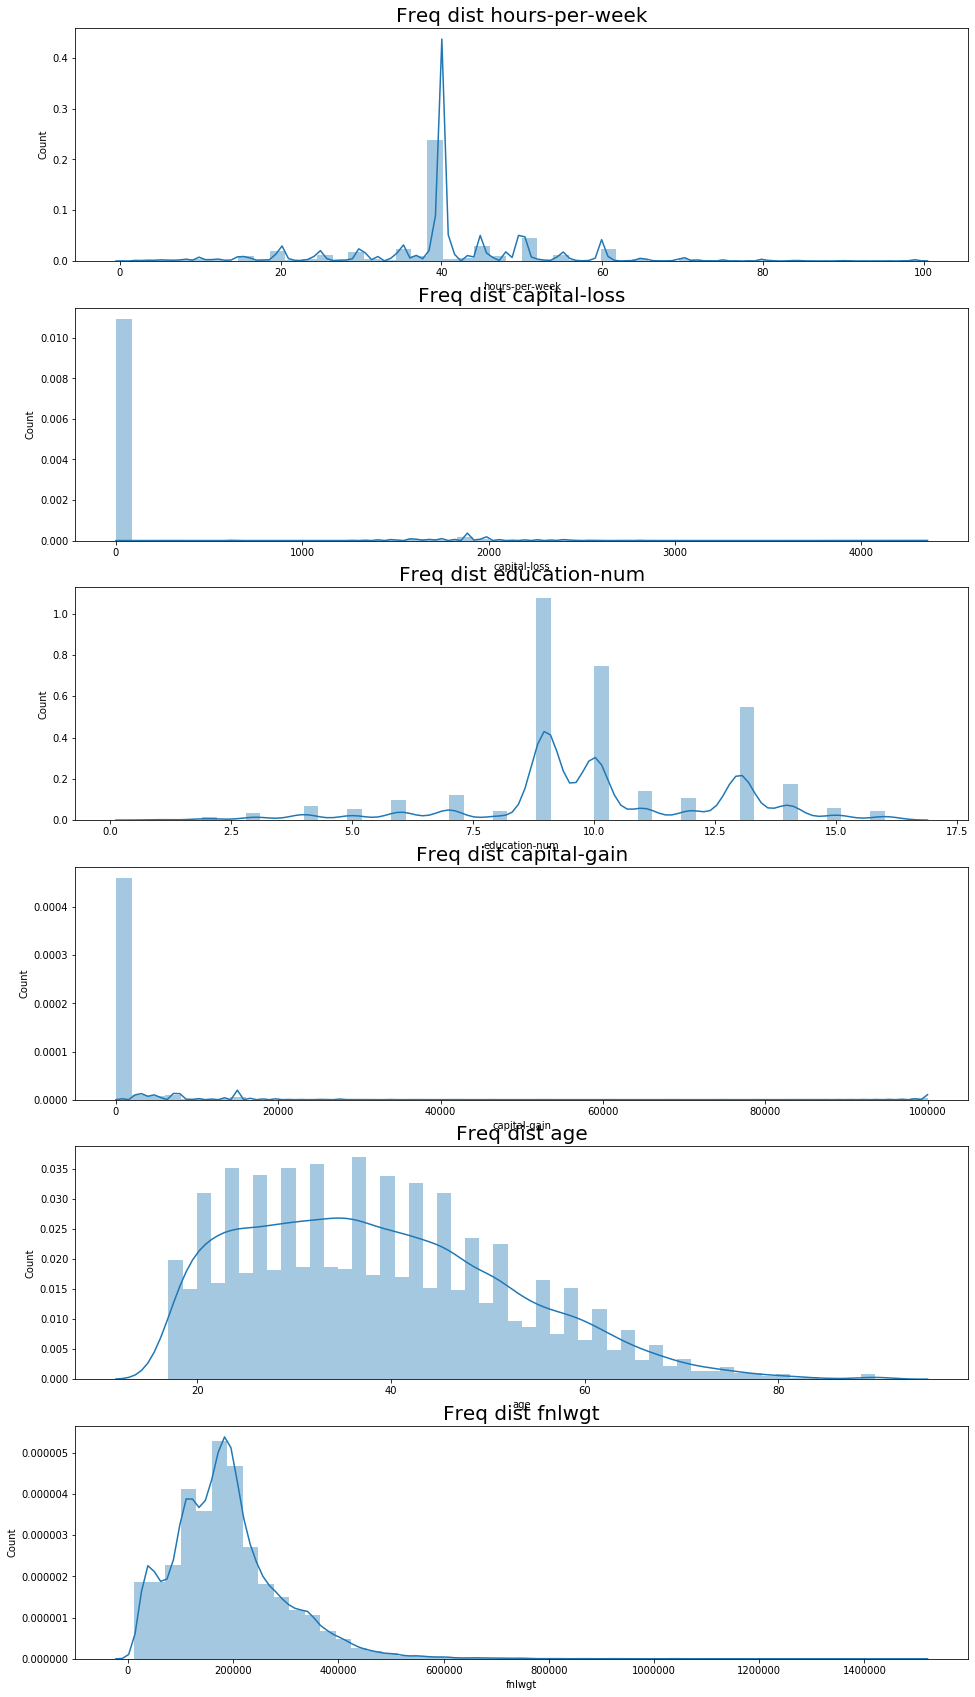

In [42]:
fig, ax = plt.subplots(len(continuous_variables_cols_list), figsize=(16, 30))
for idx, continuous_variables_col in enumerate(continuous_variables_cols_list):
    sns.distplot(dataset[continuous_variables_col], hist=True, ax=ax[idx])
    ax[idx].set_title('Freq dist '+ continuous_variables_col, fontsize=20)
    ax[idx].set_xlabel(continuous_variables_col, fontsize=10)
    ax[idx].set_ylabel('Count', fontsize=10)
plt.show()

### 6. Draw pairwise scatterplots for continuous variables. Explain any discernable patterns? 

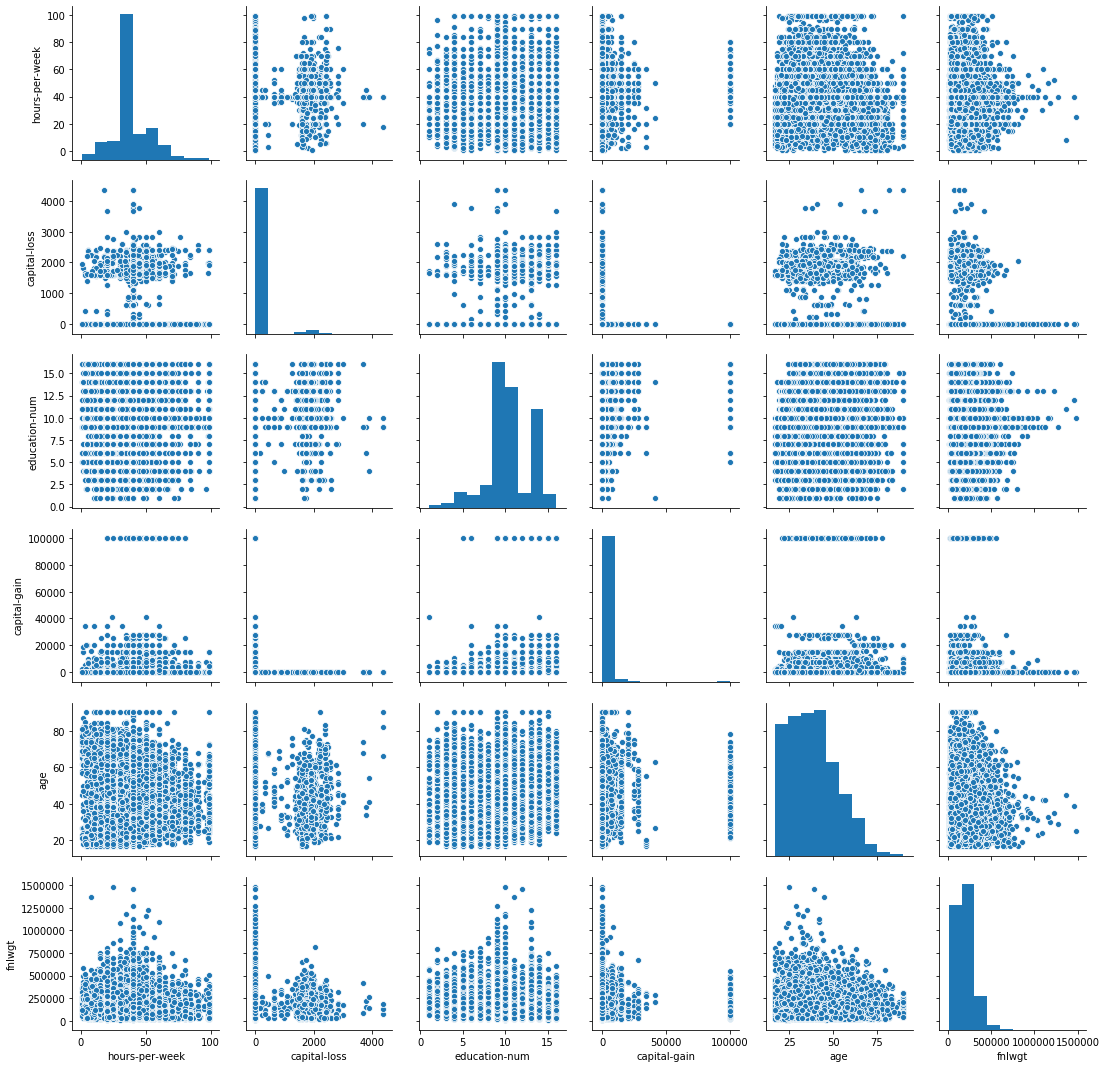

In [43]:
# method1
sns.pairplot(dataset[continuous_variables_cols_list])
plt.show()

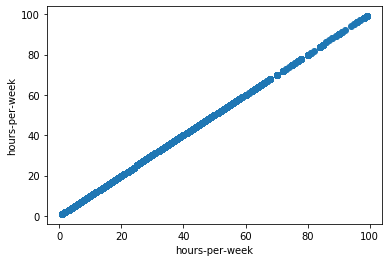

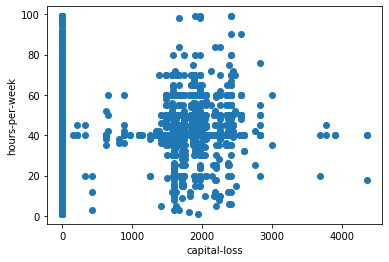

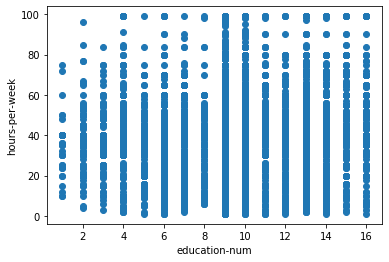

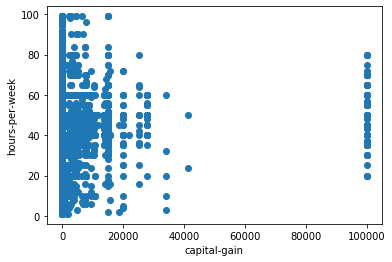

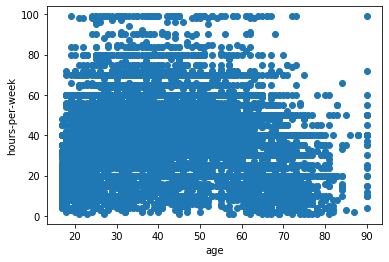

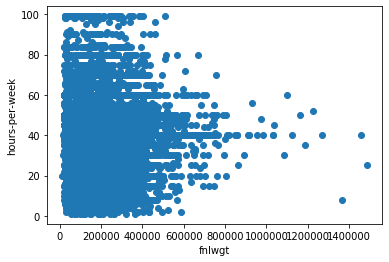

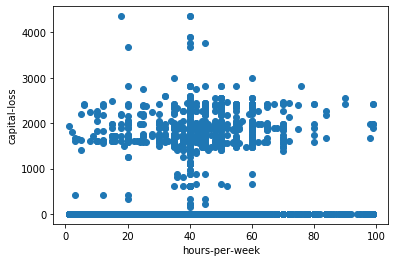

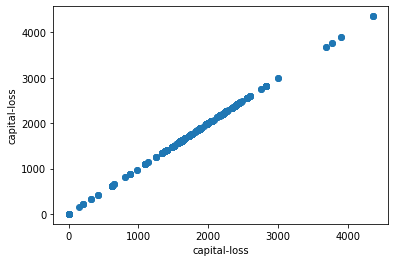

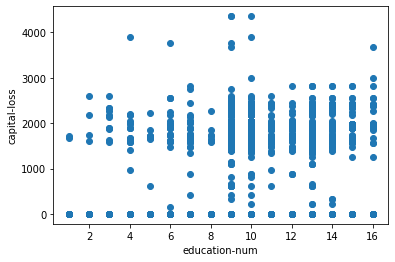

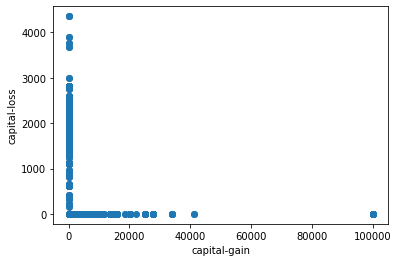

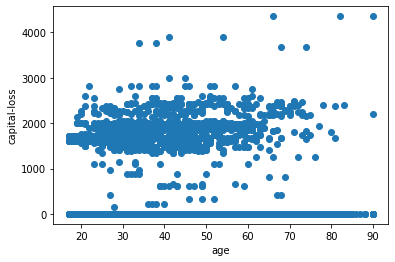

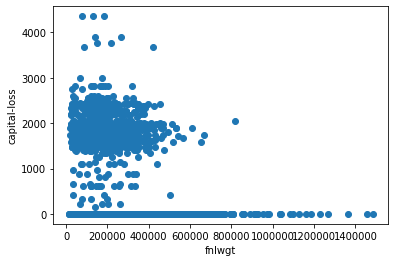

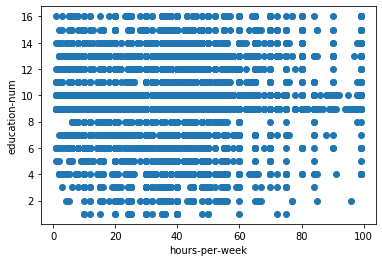

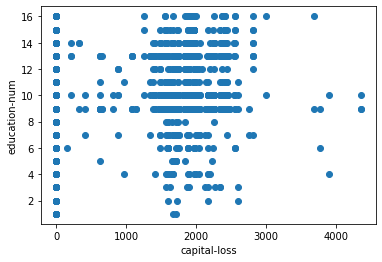

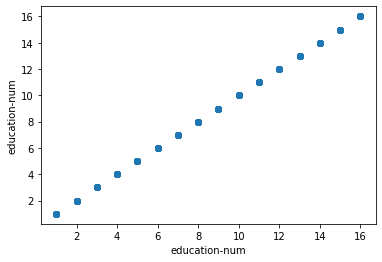

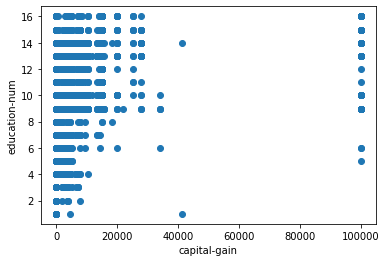

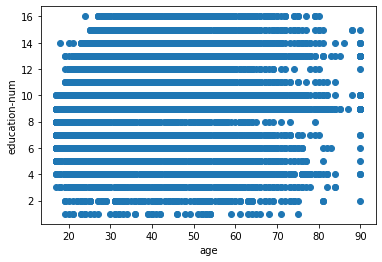

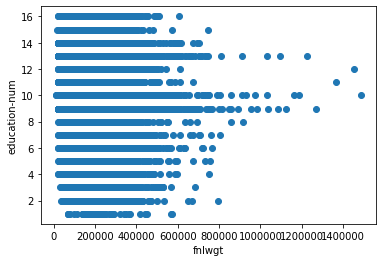

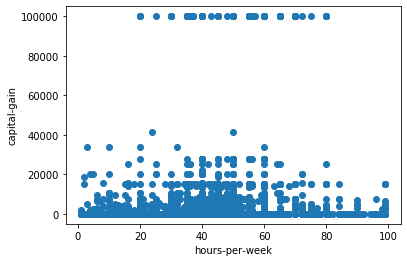

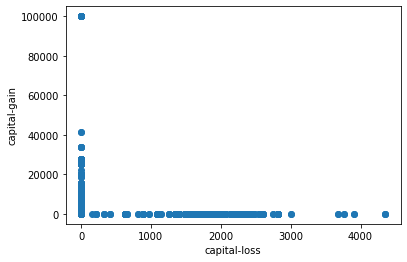

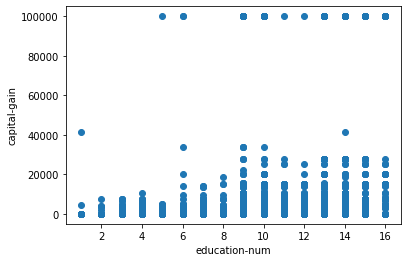

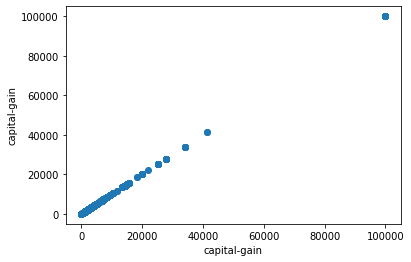

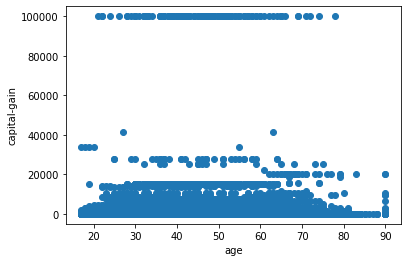

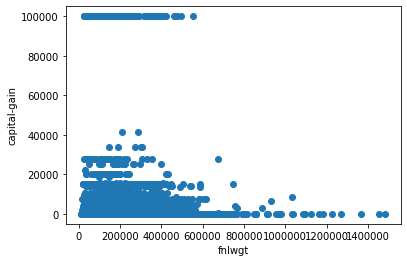

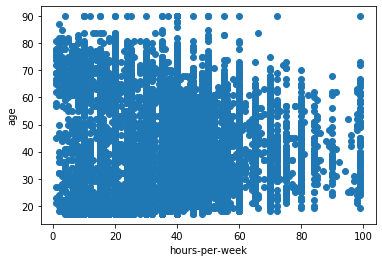

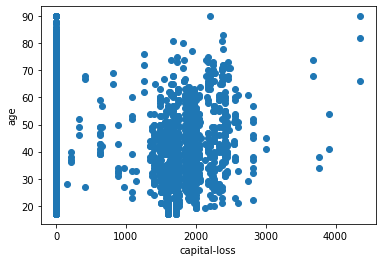

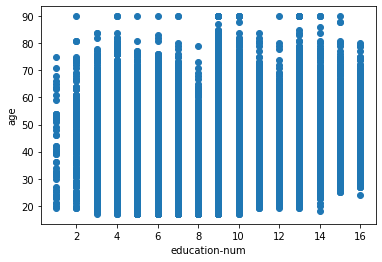

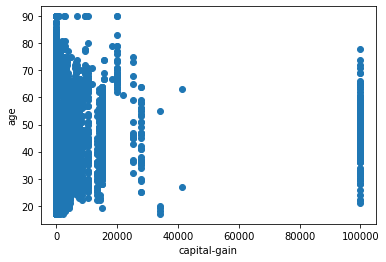

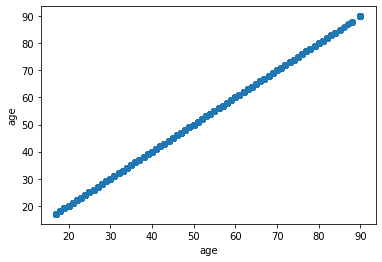

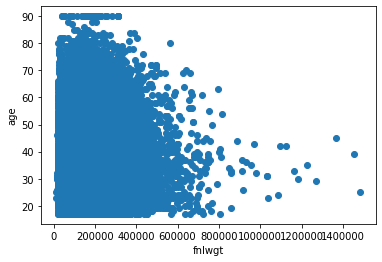

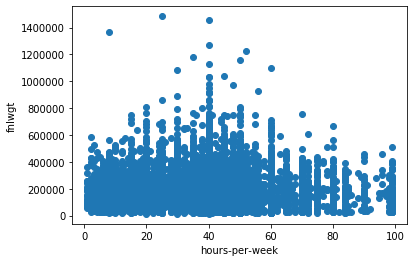

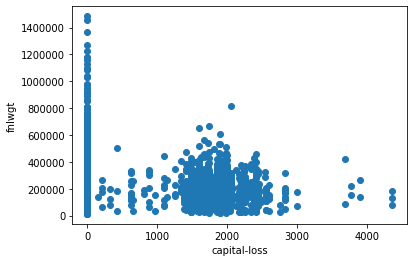

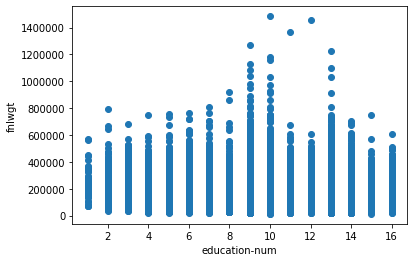

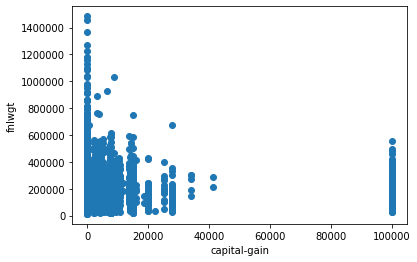

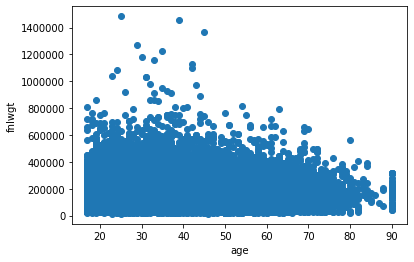

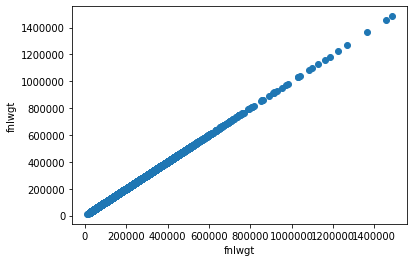

In [44]:
# method2
for continuous_variables_col2 in continuous_variables_cols_list:
    for continuous_variables_col1 in continuous_variables_cols_list: 
        plt.scatter(dataset[continuous_variables_col1], dataset[continuous_variables_col2])       
        plt.xlabel(f'{continuous_variables_col1}')
        plt.ylabel(f'{continuous_variables_col2}')
        plt.show()

* capital-gain和capital-loss呈現L型，因為兩者一至少有一個為0(因兩者有互斥性質)
* capital-gain當一軸時，中間通常是空掉的
* 有些的分布情形是佈滿圖，而有些是點大部分接近於兩軸

### 7. Draw a heatmap for the correlations among all variables. What do you observe? 

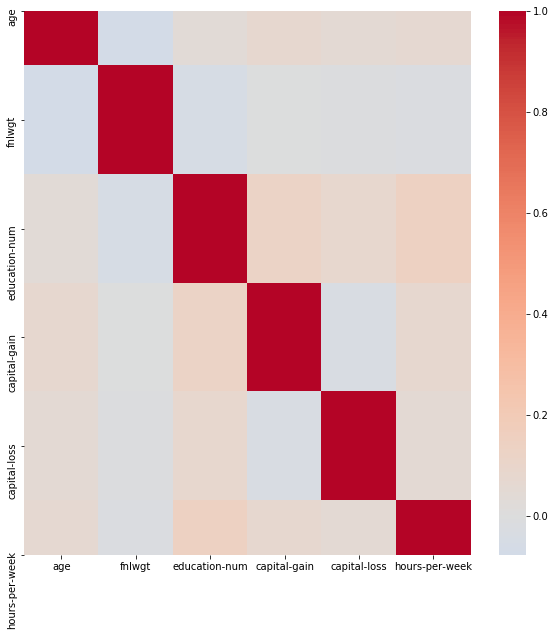

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
#plt.savefig('heatmap.png')
plt.show()

* correlation是pairwise
* only continuous variables, no categorical variables
* 自己和自己的block一定是紅色(因為correlation = 1)
* fnlwgt和大部分都無相關
* education-num算是和大部分的其他變數最相關的
* capital-gain和capital-loss幾乎為0，因為兩者一至少有一個為0(因兩者有互斥性質)